In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('marvel_comics.csv')

In [4]:
df.head()

comic_name active_years  \
0     A Year of Marvels: April Infinite Comic (2016)       (2016)   
1    A Year of Marvels: August Infinite Comic (2016)       (2016)   
2  A Year of Marvels: February Infinite Comic (2016)       (2016)   
3      A Year of Marvels: July Infinite Comic (2016)       (2016)   
4      A Year of Marvels: June Infinite Comic (2016)       (2016)   

                                         issue_title       publish_date  \
0  A Year of Marvels: April Infinite Comic (2016) #1     April 01, 2016   
1  A Year of Marvels: August Infinite Comic (2016...    August 10, 2016   
2  A Year of Marvels: February Infinite Comic (20...  February 10, 2016   
3   A Year of Marvels: July Infinite Comic (2016) #1      June 29, 2016   
4   A Year of Marvels: June Infinite Comic (2016) #1      June 15, 2016   

                                   issue_description  \
0  The Infinite Comic that will have everyone tal...   
1  It’s August, and Nick Fury is just in time to ...   
2  Join us in a brand new Marvel comics adventure...   
3  Celebrating the Fourth of July is complicated ...   
4  Sam Alexander’s finding it hard to cope with t...   

                    penciler                   writer    cover_artist  \
0               Yves Bigerel             Yves Bigerel  Jamal Campbell   
1             Jamal Campbell  Chris Sims, Chad Bowers             NaN   
2  Danilo S. Beyruth, M Mast               Ryan North             NaN   
3             Juanan Ramirez             Chuck Wendig  Jamal Campbell   
4            Diego Olortegui               Paul Allor  Jamal Campbell   

            Imprint           Format     Rating  Price  
0   Marvel Universe   Infinite Comic   Rated T+   Free  
1   Marvel Universe   Infinite Comic        NaN   Free  
2   Marvel Universe   Infinite Comic   Rated T+   Free  
3   Marvel Universe   Infinite Comic        NaN   Free  
4   Marvel Universe   Infinite Comic        NaN   Free

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 0 to 34991
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comic_name         34853 non-null  object
 1   active_years       34853 non-null  object
 2   issue_title        34332 non-null  object
 3   publish_date       34332 non-null  object
 4   issue_description  30301 non-null  object
 5   penciler           25398 non-null  object
 6   writer             27508 non-null  object
 7   cover_artist       12224 non-null  object
 8   Imprint            11650 non-null  object
 9   Format             32766 non-null  object
 10  Rating             12583 non-null  object
 11  Price              32766 non-null  object
dtypes: object(12)
memory usage: 3.5+ MB


In [7]:
df.isnull().sum()

comic_name               0
active_years             0
issue_title            521
publish_date           521
issue_description     4552
penciler              9455
writer                7345
cover_artist         22629
Imprint              23203
Format                2087
Rating               22270
Price                 2087
dtype: int64

In [8]:
# reformating publish date from November 12, 2011 to 2011-11-12
try:
    df['publish_date'] = pd.to_datetime(df['publish_date'], format='%B %d, %Y')
except ValueError:
    try:
        df['publish_date'] = pd.to_datetime(df['publish_date'], format='ISO8601')
    except ValueError:
        df['publish_date'] = pd.to_datetime(df['publish_date'], format='mixed')

In [9]:
df['year'] = df['publish_date'].dt.year

In [10]:
def clean_price(price_str):
    if isinstance(price_str, float):
        return price_str
    elif price_str.strip().lower() == 'free':
        return 0.0
    else:
        try:
            return float(price_str.strip().lstrip('$').replace(',', ''))
        except ValueError:
            return None
df['Price'] = df['Price'].apply(clean_price)
df['Price'].fillna(0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 0 to 34991
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   comic_name         34853 non-null  object        
 1   active_years       34853 non-null  object        
 2   issue_title        34332 non-null  object        
 3   publish_date       34332 non-null  datetime64[ns]
 4   issue_description  30301 non-null  object        
 5   penciler           25398 non-null  object        
 6   writer             27508 non-null  object        
 7   cover_artist       12224 non-null  object        
 8   Imprint            11650 non-null  object        
 9   Format             32766 non-null  object        
 10  Rating             12583 non-null  object        
 11  Price              34853 non-null  float64       
 12  year               34332 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 3.7+ MB

In [12]:
df.describe()

publish_date         Price          year
count                          34332  34853.000000  34332.000000
mean   2000-05-16 09:35:27.787486848      1.817127   1999.881539
min              1939-08-31 00:00:00      0.000000   1939.000000
25%              1990-12-01 00:00:00      0.000000   1990.000000
50%              2005-05-04 00:00:00      0.150000   2005.000000
75%              2012-03-14 00:00:00      3.990000   2012.000000
max              2029-12-31 00:00:00     99.990000   2029.000000
std                              NaN      2.597751     15.905926

In [13]:
df['Price']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
34987    3.99
34988    3.99
34989    3.99
34990    3.99
34991    3.99
Name: Price, Length: 34853, dtype: float64

In [14]:
plt.scatter(df['publish_date'], df['Price'], alpha=0.25)
plt.title('Comic Price over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The price range is generally between 0 and 3.99. Said prices were generally cheaper the further into the past we go. However, the value for the most popular comics will jump to around 10 dollars. Other outliers can price even higher.

In [15]:
plt.figure(figsize=(10, 5)) 
plt.hist(df['year'], bins=20, color='salmon', edgecolor='black')
plt.title('Publishing of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The most number of comics were published in the 2000s according to our data. This data is not completely reliable because I'm unsure if the gathered data is complete. However, it is reasonable to conclude that the frequency of published comics did go up as comic popularity went up around the 90s and then 2000s. 

# Top 10 Categories #

Below are value counts of the various columns we have in our dataframe.

In [16]:
plt.title("Top 10 active_years")
sns.countplot(data=df, y='active_years', order=df['active_years'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [17]:
plt.title("Top 10 pencilers")
sns.countplot(data=df, y='penciler', order=df['penciler'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


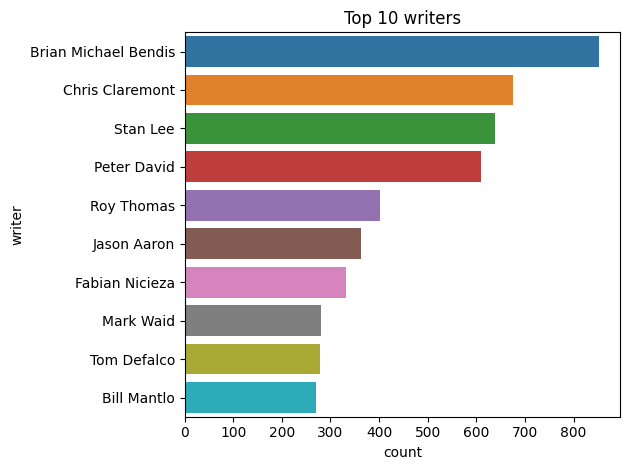

In [18]:
plt.title("Top 10 writers")
sns.countplot(data=df, y='writer', order=df['writer'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


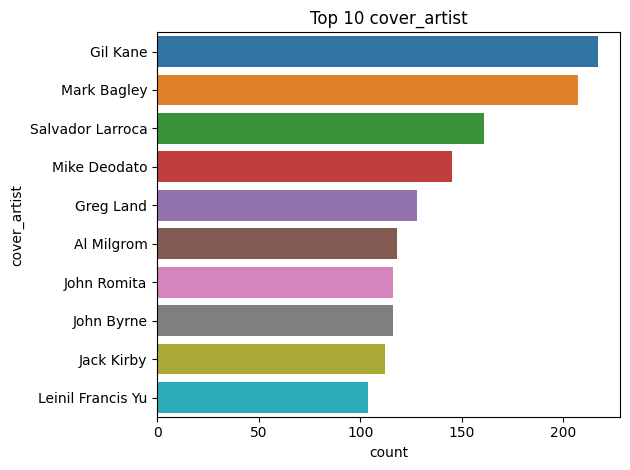

In [19]:
plt.title("Top 10 cover_artist")
sns.countplot(data=df, y='cover_artist', order=df['cover_artist'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

**Cover Artist, Penciler and Writer**
These categories are great classification modeling options. Generally, the most popular creators get asked/hired for more work.

C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


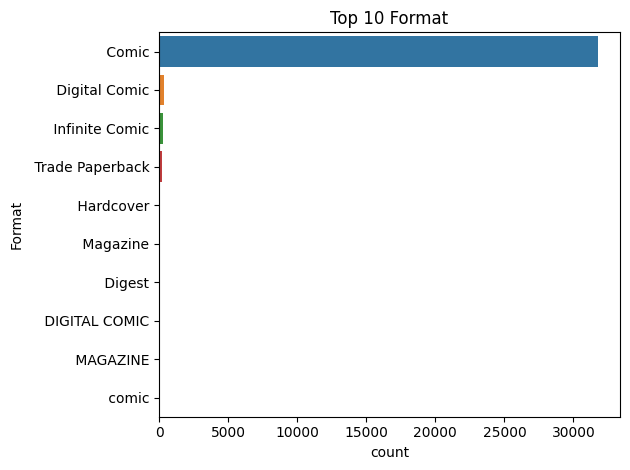

In [20]:
plt.title("Top 10 Format")
sns.countplot(data=df, y='Format', order=df['Format'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


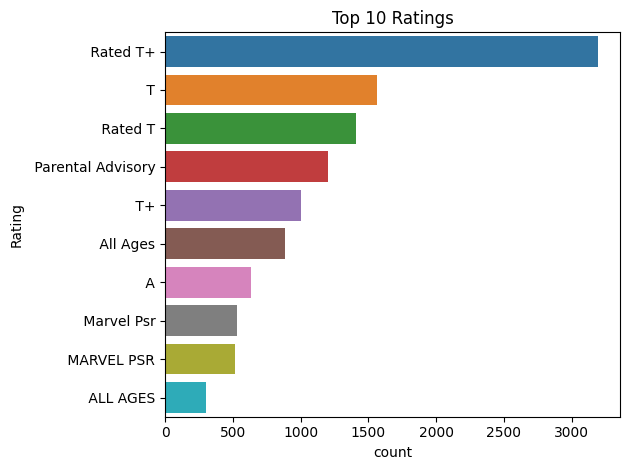

In [21]:
plt.title("Top 10 Ratings")
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

**Top Ratings**
This can be a peak inside age demographics. Though, we'll need more data to be accurate. 
It can also be used in conjunction with the description to help inform the reader about the type of plotline. 

C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


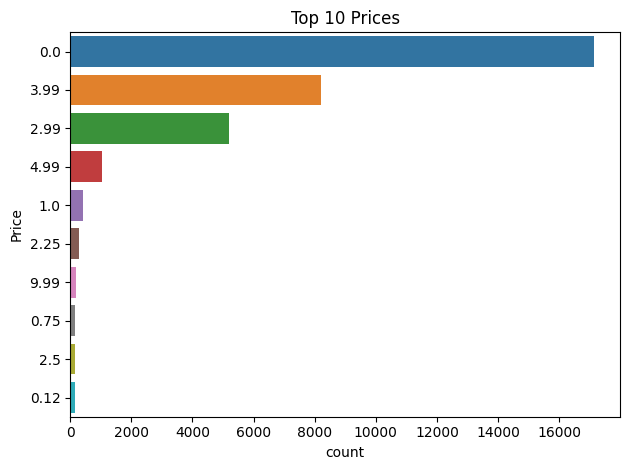

In [22]:
plt.title("Top 10 Prices")
sns.countplot(data=df, y='Price', order=df['Price'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


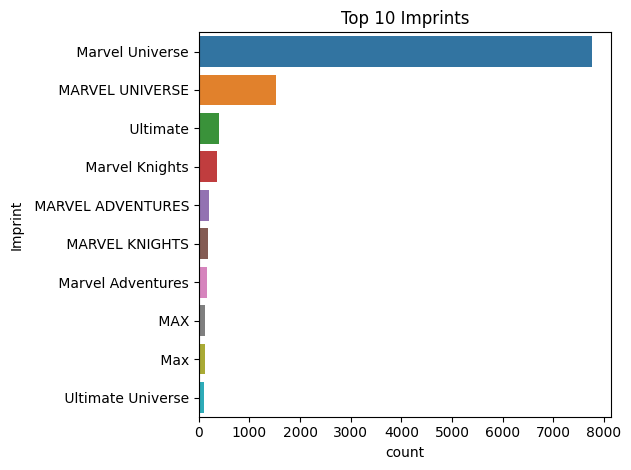

In [23]:
plt.title("Top 10 Imprints")
sns.countplot(data=df, y='Imprint', order=df['Imprint'].value_counts().iloc[:10].index)
plt.tight_layout()
plt.show()

In [24]:
df['description_length'] = df['issue_description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 6))
plt.hist(df['description_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Description Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

The description length is measured by characters. I am planning to do a recommendation system based on natural language processing so the issue discription is going to be of great importance. Many of the descriptions are short in length. I'll have to keep an eye on this and test to make sure that even if it is short, it has the key words needed. Or go hunting for supplimentary data. 

In [25]:
df['issue_description']

0        The Infinite Comic that will have everyone tal...
1        It’s August, and Nick Fury is just in time to ...
2        Join us in a brand new Marvel comics adventure...
3        Celebrating the Fourth of July is complicated ...
4        Sam Alexander’s finding it hard to cope with t...
                               ...                        
34987    NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...
34988    With a thousand zombies in front of him and tw...
34989    The hordes of zombies gathered outside the hig...
34990    For Simon Garth, it's come down to two very ba...
34991    Cash stolen from the botched bank job: $125,00...
Name: issue_description, Length: 34853, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 0 to 34991
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comic_name          34853 non-null  object        
 1   active_years        34853 non-null  object        
 2   issue_title         34332 non-null  object        
 3   publish_date        34332 non-null  datetime64[ns]
 4   issue_description   30301 non-null  object        
 5   penciler            25398 non-null  object        
 6   writer              27508 non-null  object        
 7   cover_artist        12224 non-null  object        
 8   Imprint             11650 non-null  object        
 9   Format              32766 non-null  object        
 10  Rating              12583 non-null  object        
 11  Price               34853 non-null  float64       
 12  year                34332 non-null  float64       
 13  description_length  34853 non-null  int64         


**More Stuff To Do**
I generally have a handle the the classification data. However, I want to go back and do more natural language processing oriented EDA. This can include most popularly used words and trying to assosiate keywords to common plot tropes. 